In [1]:
# our goal is how to predict the multiclass classification using ANN

In [2]:
# will work on MNIST digit

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

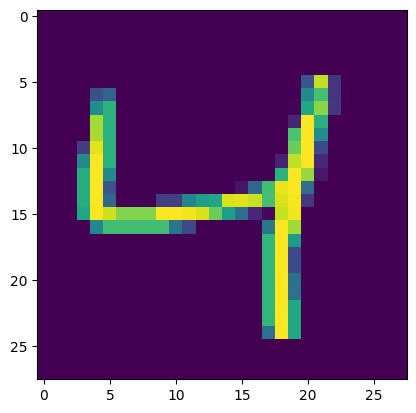

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [27]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer= 'Adam',metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0892 - accuracy: 0.9737 - val_loss: 0.1150 - val_accuracy: 0.9671
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9753 - val_loss: 0.1109 - val_accuracy: 0.9683
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0804 - accuracy: 0.9760 - val_loss: 0.1121 - val_accuracy: 0.9673
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0780 - accuracy: 0.9774 - val_loss: 0.1132 - val_accuracy: 0.9656
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.1124 - val_accuracy: 0.9660
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0708 - accuracy: 0.9796 - val_loss: 0.1059 - val_accuracy: 0.9693
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.1053 - val_accuracy:

In [37]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_pred = y_prob.argmax(axis=1)

In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8852

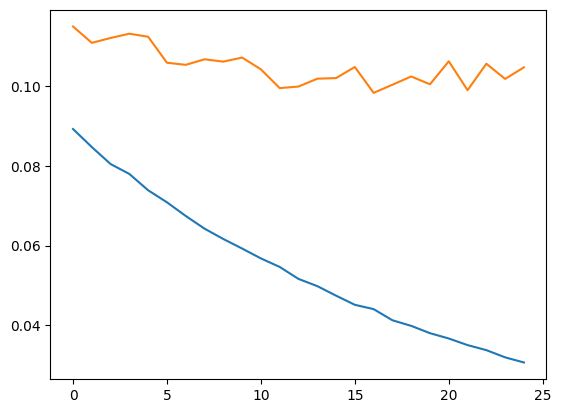

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

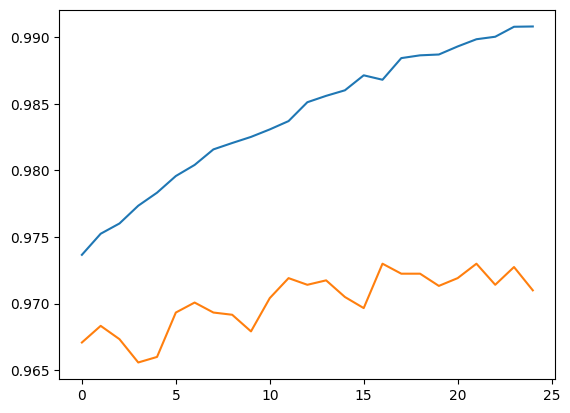

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

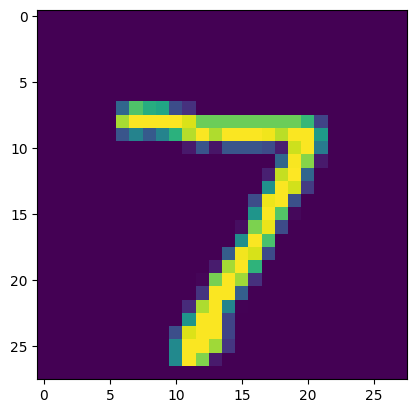

In [43]:
plt.imshow(X_test[0])

In [45]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 50ms/step


array([7], dtype=int64)